In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv('data/cause_of_death_indonesia.csv')
df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
985,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...
986,Tuberkulosis paru lainnya,Bencana Non Alam dan Penyakit,2005,0,2024,Profil Kesehatan Indonesia Tahun 2005,21,https://pusdatin.kemkes.go.id/download.php?fil...
987,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2016,0,0,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
988,Wabah Penyakit (Epidemi),Bencana Non Alam dan Penyakit,2017,0,0,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...


In [2]:
df.columns

Index(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source',
       'Page at Source', 'Source URL'],
      dtype='object')

In [3]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

In [4]:
df[df["Source URL"].isna() | df["Page at Source"].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
310,COVID-19,Bencana Non Alam dan Penyakit,2020,1,22138,COVID19.go.id,NaN,NaN
311,COVID-19 (per tanggal 24/4/2021),Bencana Non Alam dan Penyakit,2021,1,22362,COVID19.go.id,NaN,NaN


In [5]:
df.loc[df.Cause == "COVID-19", "Total Deaths"] = 22138 + 22362
df.loc[df.Cause == "COVID-19", "Year"] = 2021
df.loc[df.Cause == "COVID-19", "Source URL"] = "unknown"
df.loc[df.Cause == "COVID-19", "Page at Source"] = "unknown"

In [6]:
df_to_drop = df[ df['Cause'] == "COVID-19 (per tanggal 24/4/2021)" ] 
df = df.drop(df_to_drop.index)
df.reset_index(drop=True, inplace=True)

In [7]:
df[(df["Cause"]=="COVID-19") | (df["Cause"]=="COVID-19 (per tanggal 24/4/2021)")]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
310,COVID-19,Bencana Non Alam dan Penyakit,2021,1,60027,COVID19.go.id,unknown,unknown


In [8]:
df['Cause'] = df['Cause'].replace('\s+', ' ', regex=True)
df['Type'] = df['Type'].replace('\s+', ' ', regex=True)
df['Source'] = df['Source'].replace('\s+', ' ', regex=True)
df['Page at Source'] = df['Page at Source'].replace('\s+', ' ', regex=True)
df['Source URL'] = df['Source URL'].replace('\s+', ' ', regex=True)

In [9]:
df.drop_duplicates(subset=['Cause', 'Type', 'Year', 'Total Deaths'], inplace=True)
df = df[df['Total Deaths'] != 0]
df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
981,Tsunami Aceh (Hilang),Bencana Alam,2004,0,37527,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
982,Tsunami Aceh (Meninggal),Bencana Alam,2004,0,129171,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...
984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...


Type
Bencana Alam                     184471
Bencana Non Alam dan Penyakit    658789
Bencana Sosial                      253
Name: Total Deaths, dtype: int64

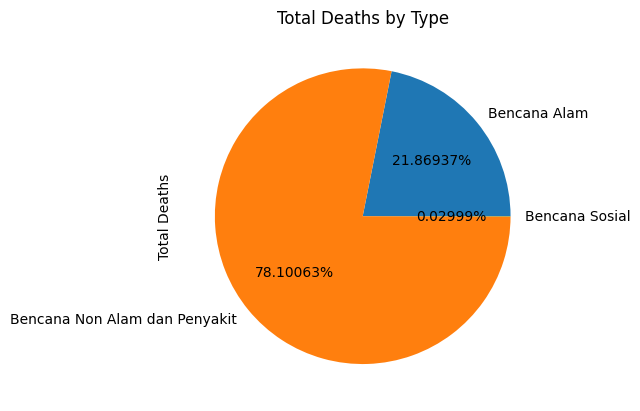

In [10]:
df_by_type = df.groupby('Type')["Total Deaths"].sum()
df_by_type.plot(kind='pie', y='Total Deaths', autopct='%1.5f%%', title='Total Deaths by Type')
df_by_type

In [11]:
filtered_df = df[df['Type'].str.contains('Bencana Non Alam dan Penyakit', case=False) & (~df['Cause'].str.contains('kecelakaan', case=False, regex=False)) & (~df['Cause'].str.contains('kebakaran', case=False, regex=False)) & (~df['Cause'].str.contains('kegagalan', case=False, regex=False))]
filtered_df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
976,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2018,0,4,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.22,https://pusdatin.kemkes.go.id/download.php?fil...
977,Tetanus Neonatorium,Bencana Non Alam dan Penyakit,2019,0,2,Profil Kesehatan Indonesia Tahun 2019,Lampiran 62.a,https://pusdatin.kemkes.go.id/download.php?fil...
983,Tuberkulosis,Bencana Non Alam dan Penyakit,2019,0,11993,Profil Kesehatan Indonesia Tahun 2019,Lampiran 52,https://pusdatin.kemkes.go.id/download.php?fil...
984,Tuberkulosis paru,Bencana Non Alam dan Penyakit,2004,0,3852,Profil Kesehatan Indonesia Tahun 2004,20,https://pusdatin.kemkes.go.id/download.php?fil...


In [21]:
filtered_df.groupby('Cause')['Total Deaths'].sum().sort_values(ascending=False).head(10)

Cause
Penyakit Sistem Sirkulasi Darah                              84298
COVID-19                                                     60027
Penyakit Infeksi & Parasit Tertentu                          59700
Kondisi Tertentu yang bermula pada masa Perinatal            38370
Penyakit Sistem Napas                                        27635
Penyakit Sistem Cerna                                        24941
Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya    21813
Penyakit Endokrin, Nutrisi, dan Metabolik                    20615
Demam Berdarah Dengue (DBD)                                  18013
Penyakit Sistem Kemih Kelamin                                17239
Name: Total Deaths, dtype: int64

In [193]:
unique_values = filtered_df['Cause'].unique()
unique_values

array(['AIDS', 'Antraks', 'Avian Influenza (Flu Burung)', 'Batuk Rejan',
       'Campak', 'Cedera intrakranial', 'Cedera lahir',
       'Cedera YDT lainnya YTT dan daerah badan Multipel',
       'Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya',
       'COVID-19', 'Demam Berdarah Dengue (DBD)',
       'Demam Tifoid dan Paratifoid',
       'Demam yang Sebabnya Tidak Diketahui', 'Diabetes melitus YTT',
       'Diare',
       'Diare & gastroenteritis Oleh penyebab infeksi tertentu (kolitis infeksi)',
       'Difteri', 'Dispepsia', 'Eklamsia dan preeklamsia',
       'Faktor yg Mempengaruhi Keadaan Kesehatan & yg Berhubungan dengan Pelayanan Kesehatan',
       'Gagal ginjal lainnya', 'Gagal Teknologi',
       'Gangguan Mental & Perilaku',
       'Gangguan saluran napas lainnya yang berhubungan dengan masa perinatal',
       'Gastritis dan Duodenitis',
       'Gejala, Tanda & Penemuan Laboratorium, Klinik Abnormal YTK',
       'Gizi Buruk', 'Hepatitis B', 'Hepatitis Klinis',
      

In [194]:
filtered_df["Cause"].str.strip().value_counts().sort_values(ascending=False)

Cause
KLB Diare                      29
Leptospirosis                  27
Tetanus Neonatorium            22
AIDS                           19
Demam Berdarah Dengue (DBD)    18
                               ..
TB Paru BTA Positif             1
Tuberkulosis paru               1
Rabies                          1
Tuberkulosis                    1
Tuberkulosis paru lainnya       1
Name: count, Length: 109, dtype: int64

<Axes: xlabel='Cause'>

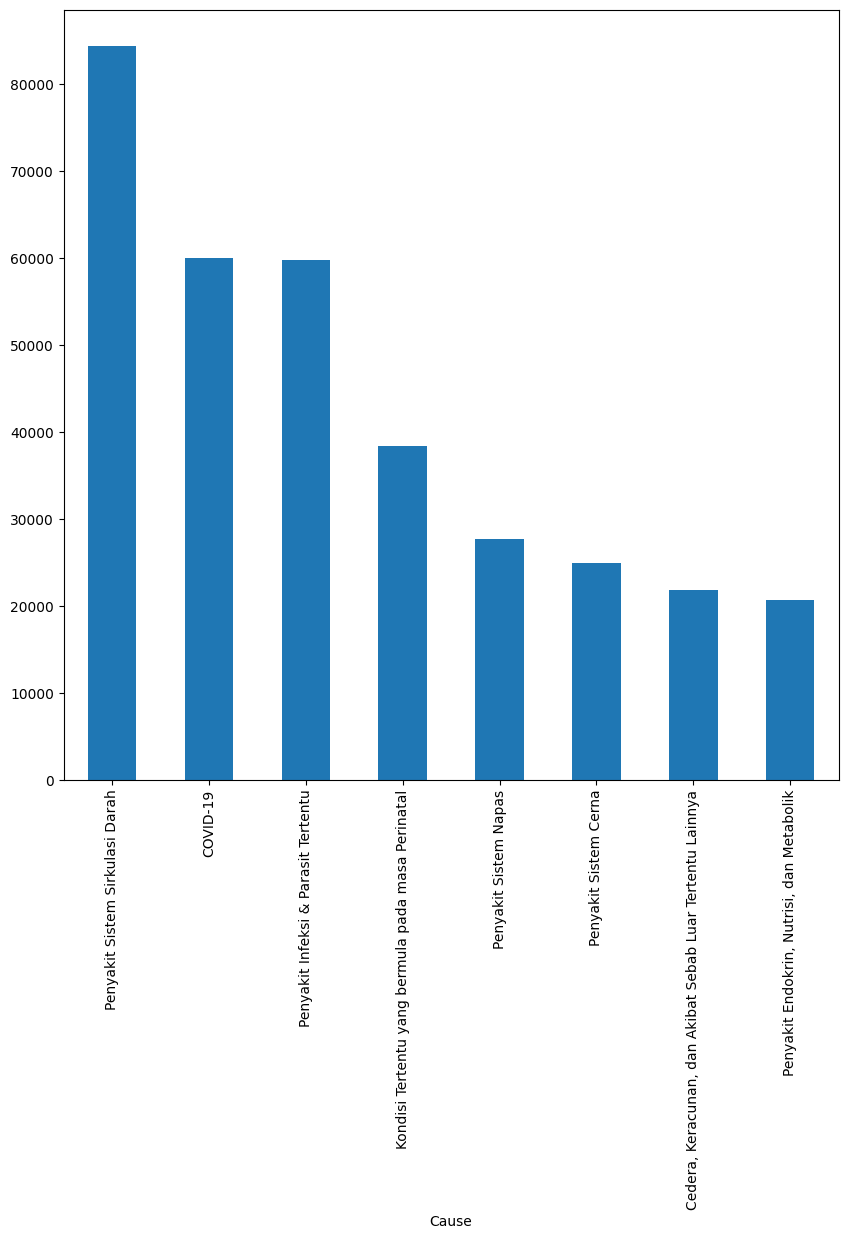

In [195]:
sum_of_death = filtered_df.groupby('Cause')['Total Deaths'].sum()
sum_of_death_filtered = sum_of_death[sum_of_death > 20000]
sum_of_death_filtered.sort_values(ascending=False).plot(kind='bar', figsize=(10, 10))


<Axes: ylabel='Total Deaths'>

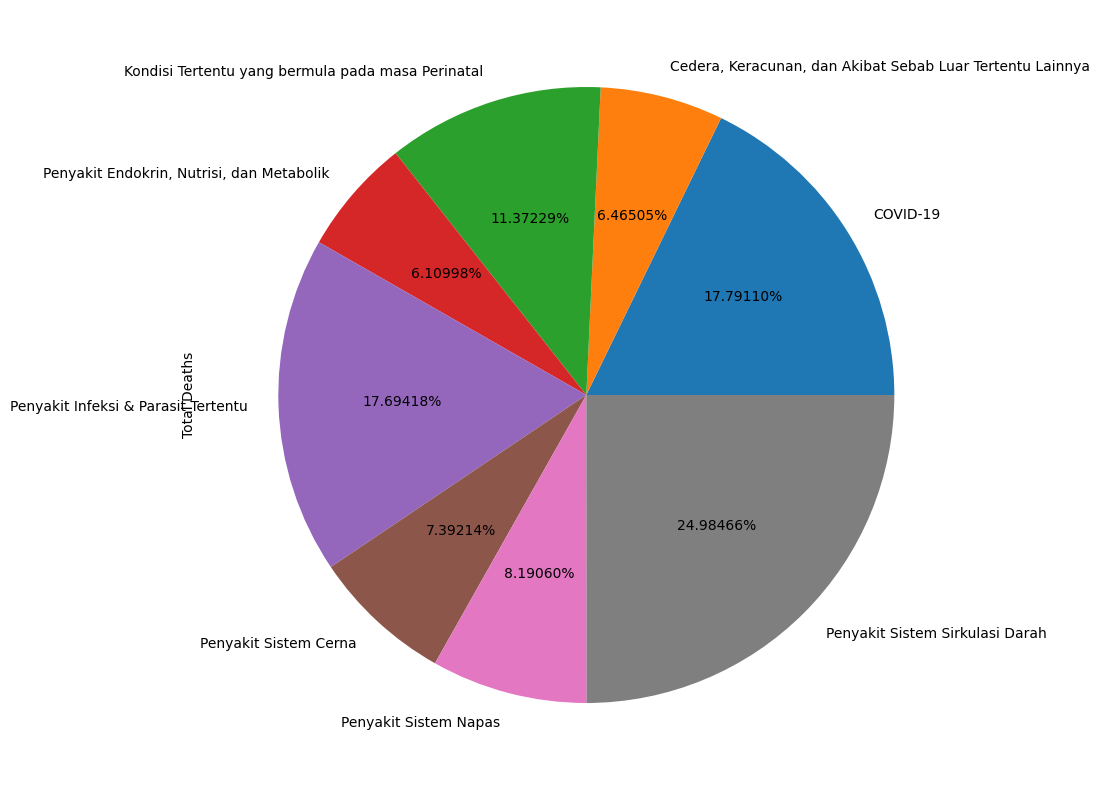

In [196]:
percentages = sum_of_death_filtered / sum_of_death_filtered.sum() * 100
percentages.plot(kind='pie', autopct='%1.5f%%', figsize=(10, 10))

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
458,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2005,0,19944,Profil Kesehatan Indonesia Tahun 2005,Lampiran 3.3.a,https://pusdatin.kemkes.go.id/download.php?fil...
459,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2006,0,19361,Profil Kesehatan Indonesia Tahun 2006,Lampiran 3.6,https://pusdatin.kemkes.go.id/download.php?fil...
460,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2007,0,21830,Profil Kesehatan Indonesia Tahun 2008,30,https://pusdatin.kemkes.go.id/download.php?fil...
461,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2008,0,23163,Profil Kesehatan Indonesia Tahun 2008,31,https://pusdatin.kemkes.go.id/download.php?fil...


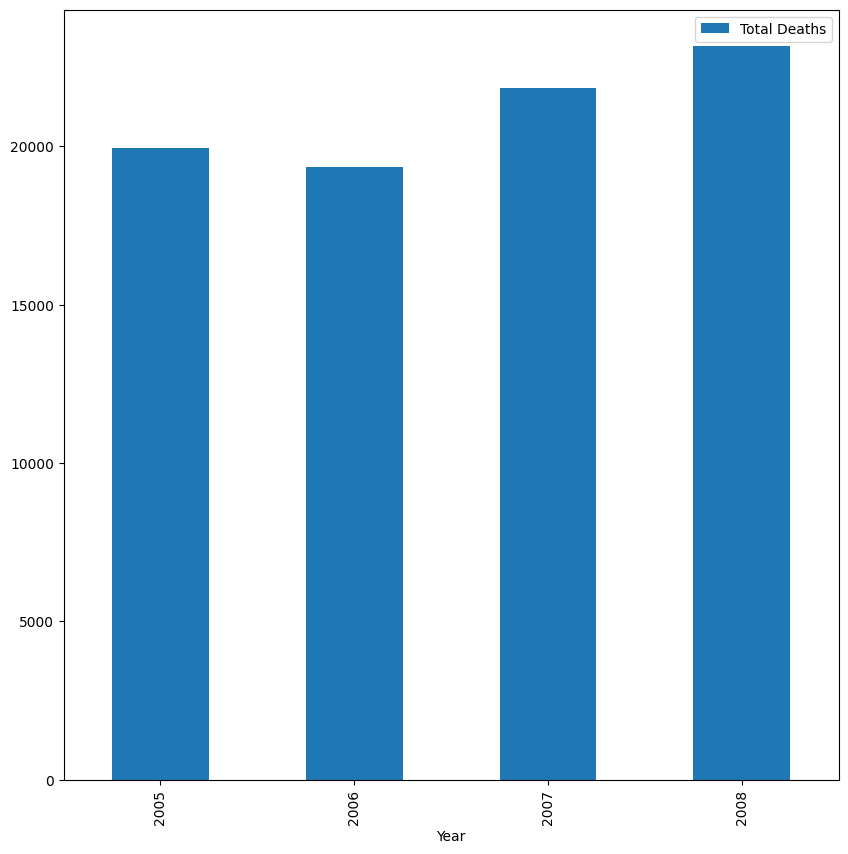

In [197]:
blood_circulation_disease_df = df[df['Cause'].str.contains('sirkulasi darah', case=False, regex=False)]
blood_circulation_disease_df.plot(x="Year", y="Total Deaths", kind="bar", figsize=(10,10))
blood_circulation_disease_df

In [198]:
year = filtered_df['Year'].unique()
year


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2019, 2013, 2014, 2017, 2012, 2015, 2021, 2016, 2018],
      dtype=int64)

In [199]:
df_by_year = filtered_df[(filtered_df['Year'] >= 2017) & (filtered_df['Year'] <= 2021)]
df_by_year

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
18,AIDS,Bencana Non Alam dan Penyakit,2019,1,614,Profil Kesehatan Indonesia Tahun 2019,Lampiran 55.d,https://pusdatin.kemkes.go.id/download.php?fil...
46,Antraks,Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,212,https://pusdatin.kemkes.go.id/download.php?fil...
62,Avian Influenza (Flu Burung),Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,213,https://pusdatin.kemkes.go.id/download.php?fil...
112,Campak,Bencana Non Alam dan Penyakit,2017,1,1,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.22,https://pusdatin.kemkes.go.id/download.php?fil...
125,COVID-19,Bencana Non Alam dan Penyakit,2021,1,60027,COVID19.go.id,unknown,unknown
141,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2017,1,493,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.31,https://pusdatin.kemkes.go.id/download.php?fil...
142,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2018,1,467,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.32,https://pusdatin.kemkes.go.id/download.php?fil...
143,Demam Berdarah Dengue (DBD),Bencana Non Alam dan Penyakit,2019,1,919,Profil Kesehatan Indonesia Tahun 2019,Lampiran 65.a,https://pusdatin.kemkes.go.id/download.php?fil...
169,Difteri,Bencana Non Alam dan Penyakit,2017,1,44,Profil Kesehatan Indonesia Tahun 2017,Lampiran 6.27,https://pusdatin.kemkes.go.id/download.php?fil...
170,Difteri,Bencana Non Alam dan Penyakit,2018,1,29,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.28,https://pusdatin.kemkes.go.id/download.php?fil...


<Axes: xlabel='Cause'>

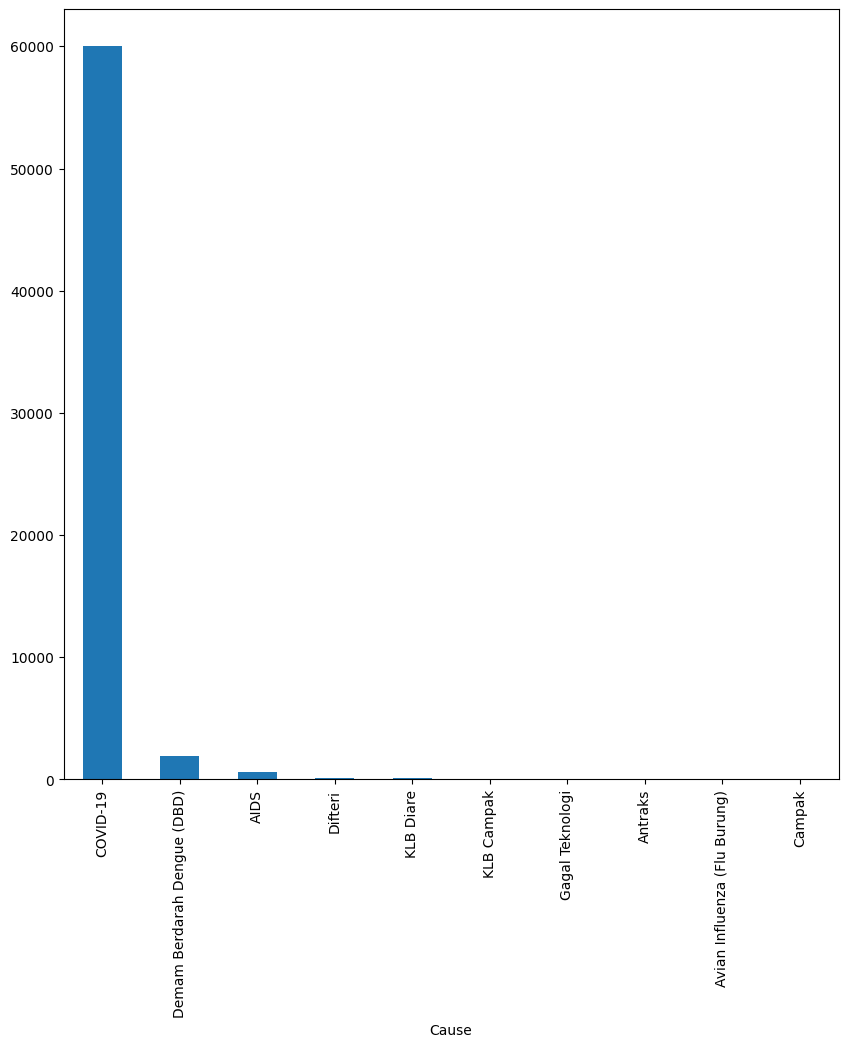

In [200]:
df_by_year_grouped_by_cause = df_by_year.groupby('Cause')['Total Deaths'].sum()
x = df_by_year_grouped_by_cause.head(10).sort_values(ascending=False)
x.plot(kind='bar', figsize=(10, 10))

In [7]:
import matplotlib.pyplot as plt
DBD = df_by_year.query('Cause == "Demam Berdarah Dengue (DBD)"')
plt.plot(DBD['Year'],DBD['Total Deaths'])
plt.xticks([2017,2018,2019,2020,2021])

plt.show()

NameError: name 'df_by_year' is not defined

In [8]:
df_by_year['Cause'].str.strip().value_counts().sort_values(ascending=False)

NameError: name 'df_by_year' is not defined

In [202]:
natural_disaster_df = df[df['Type'].str.contains('Bencana Alam', case=False)]
natural_disaster_df

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
22,Angin kencang,Bencana Alam,2008,1,3,Profil Kesehatan Indonesia Tahun 2008,Lampiran 4.31,https://pusdatin.kemkes.go.id/download.php?fil...
23,Angin Puting Beliung,Bencana Alam,2008,1,13,Profil Kesehatan Indonesia Tahun 2008,Lampiran 4.31,https://pusdatin.kemkes.go.id/download.php?fil...
24,Angin Puting Beliung,Bencana Alam,2015,1,37,Profil Kesehatan Indonesia Tahun 2015,Lampiran 6.28,https://pusdatin.kemkes.go.id/download.php?fil...
25,Angin Puting Beliung,Bencana Alam,2016,1,20,Profil Kesehatan Indonesia Tahun 2016,Lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
26,Angin Puting Beliung,Bencana Alam,2018,1,10,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.49,https://pusdatin.kemkes.go.id/download.php?fil...
...,...,...,...,...,...,...,...,...
542,Tersambar Petir,Bencana Alam,2012,0,6,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
568,Tsunami,Bencana Alam,2011,0,2,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.40,https://pusdatin.kemkes.go.id/download.php?fil...
569,Tsunami,Bencana Alam,2018,0,431,Profil Kesehatan Indonesia Tahun 2018,Lampiran 6.49,https://pusdatin.kemkes.go.id/download.php?fil...
570,Tsunami Aceh (Hilang),Bencana Alam,2004,0,37527,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...


<Axes: xlabel='Cause'>

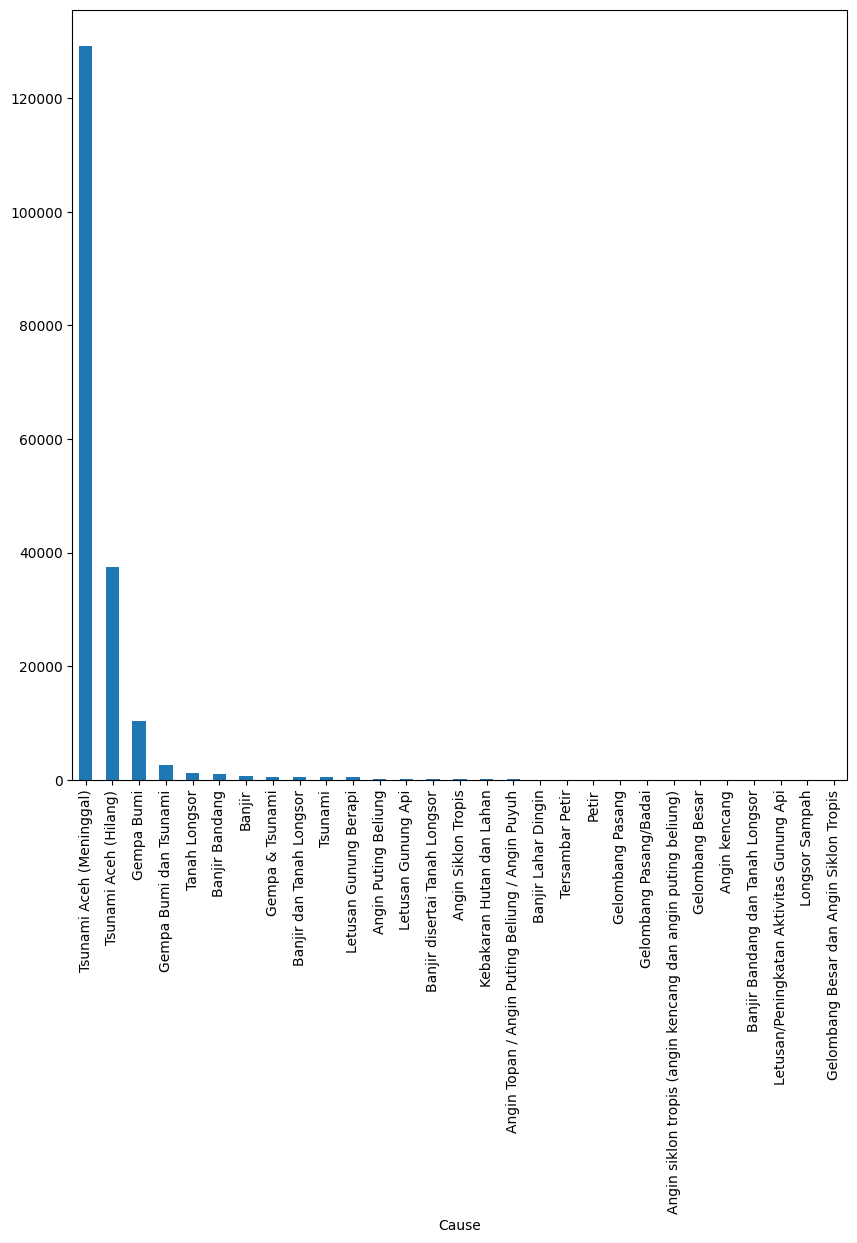

In [204]:
natural_disaster_df_grouped_by_cause = natural_disaster_df.groupby('Cause')['Total Deaths'].sum()
natural_disaster_df_grouped_by_cause.sort_values(ascending=False).plot(kind='bar', figsize=(10, 10))

<Axes: xlabel='Cause'>

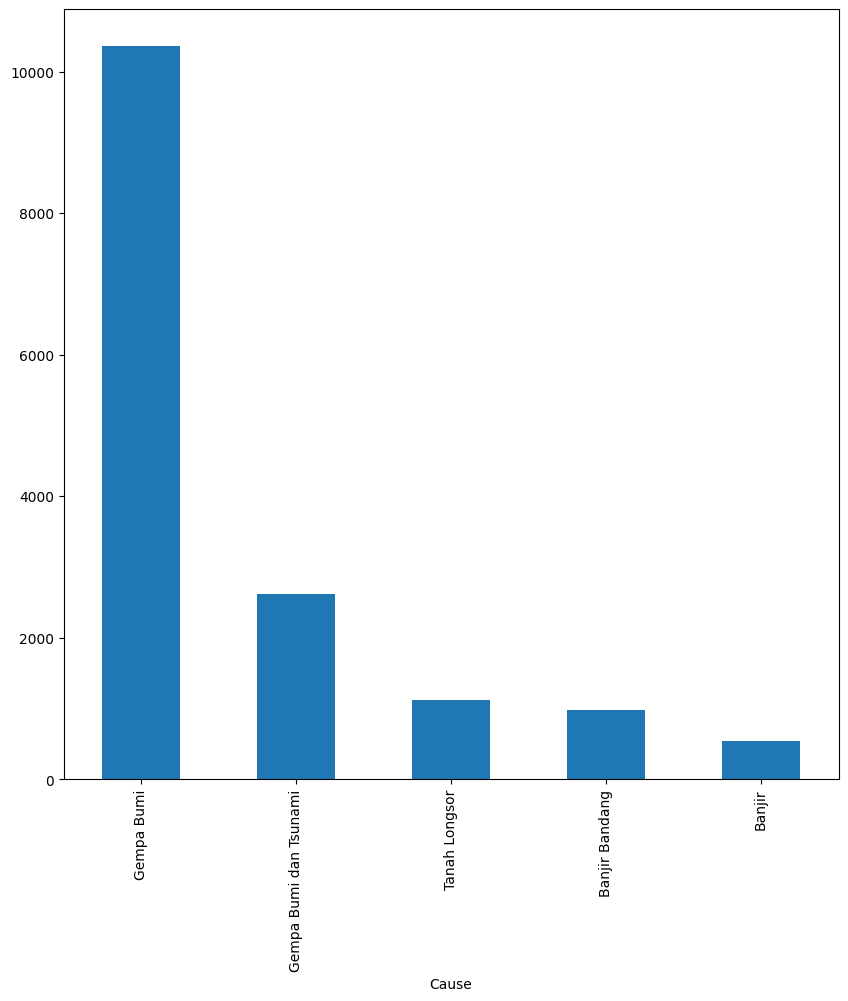

In [210]:
natural_disaster_df_without_aceh = natural_disaster_df[natural_disaster_df['Year'] != 2004]

a = natural_disaster_df_without_aceh.groupby('Cause')['Total Deaths'].sum()
a.sort_values(ascending=False).head(5).plot(kind='bar', figsize=(10, 10))